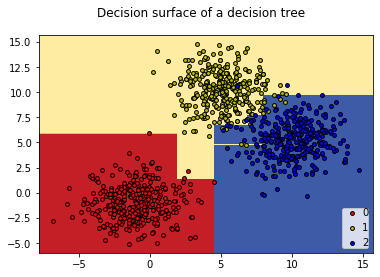

Number of wrong predictions is: 8


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # Input: groups: atuple of left dataset and right dataset after the split
    #        classes: the # classes in the dataset

    # count all samples of the dataset
    n_instances = float(sum([len(group) for group in groups]))

    # sum weighted Gini index for each group
    gini = 0.0
    
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        giniS = 0
        for subclass in classes:
            group = np.asarray(group)
            count = (group.T[-1]==subclass)
            giniS += (count.sum()/size)**2
        gini += (1-giniS) * (size/n_instances)
            
    return gini

# Select the best split point for a dataset
# find the best split point to minmize the gini_index
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            left, right = [], []
            #split
            for row2 in dataset:
                if(row2[index]>row[index]): right.append(row2)
                else: left.append(row2)
            groups = [left, right]
            #check gini
            gini = gini_index(groups, class_values)

            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node labelled by majority class in group
def leaf(group):
    # return the majority label of the set 'group'
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if len(left) == 0 or len(right) == 0:
        node['left'] = node['right'] = leaf(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'] = leaf(left)
        node['right'] = leaf(right)

        return
    # process left child
    if len(left) <= min_size:
        node['left'] = leaf(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    
    # process right child
    if len(right) <= min_size:
        node['right'] = leaf(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']


if __name__ == "__main__":

    #Stop criterion
    max_depth = 7
    min_size = 10

    # Generate Data
    n_samples = 1000
    centers = [(-1, -1), (5, 10), (10,5)]
    X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.8,
                    centers=centers, shuffle=False, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

    #Merge the data
    train = np.insert(X_train, 2, values = y_train, axis=1)
    test = np.insert(X_test, 2, values = y_test, axis=1)

    #Set up the tree
    tree = build_tree(train, max_depth, min_size)

    # Plot the decision boundary
    ###################################################################
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = list()
    for row in grid:
        Z.append(predict(tree, row))

    Z = np.array(Z).reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Plot the training points
    for i, color in zip(range(3), "ryb"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()


    # Predict on the Test Set
    ###################################################################
    y_predict  = list()
    for row in test:
        y_predict.append(predict(tree, row))

    wrong = np.count_nonzero(y_test - y_predict)
    print('Number of wrong predictions is: ' + str(wrong))


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # Input: groups: atuple of left dataset and right dataset after the split
    #        classes: the # classes in the dataset

    # count all samples of the dataset
    n_instances = float(sum([len(group) for group in groups]))

    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue

        ####################################################################
        # YOUR CODE HERE!
        # Calculate the Gini Index of the split
        #
        ####################################################################

    return gini

# Select the best split point for a dataset
# find the best split point to minmize the gini_index
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:

            ###################################################################
            # YOUR CODE HERE!
            # 1. Split the dataset by row[index]'s value to two sets: 'left', 'right'.
            # 2. Use function gini_index() to calculate 'gini'
            # (Hint: 'groups = left, right' is a tuple)
            #
            ####################################################################

            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node labelled by majority class in group
def leaf(group):
    # return the majority label of the set 'group'
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = leaf(left + right)
        return
    # check for max depth
    if depth >= max_depth:

        ###################################################################
        # YOUR CODE HERE!
        # set both left set and right set as leaves.
        ####################################################################

        return
    # process left child
    if len(left) <= min_size:
        node['left'] = leaf(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)

    ###################################################################
    # YOUR CODE HERE!
    # 1. If right group is no more than min_size, set it to leaf.
    # 2. Else, recur split in the right group.
    ####################################################################

# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']


if __name__ == "__main__":

    #Stop criterion
    max_depth = 3
    min_size = 10

    # Generate Data
    n_samples = 1000
    centers = [(-1, -1), (5, 10), (10,5)]
    X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.8,
                    centers=centers, shuffle=False, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

    #Merge the data
    train = np.insert(X_train, 2, values = y_train, axis=1)
    test = np.insert(X_test, 2, values = y_test, axis=1)

    #Set up the tree
    tree = build_tree(train, max_depth, min_size)

    # Plot the decision boundary
    ###################################################################
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = list()
    for row in grid:
        Z.append(predict(tree, row))

    Z = np.array(Z).reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Plot the training points
    for i, color in zip(range(3), "ryb"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()


    # Predict on the Test Set
    ###################################################################
    y_predict  = list()
    for row in test:
        y_predict.append(predict(tree, row))

    wrong = np.count_nonzero(y_test - y_predict)
    print('Number of wrong predictions is: ' + str(wrong))


In [6]:
def train(X_train, y_train, tol = 10 ** -4):

    LearningRate = 0.05
    
    weights, wp = [],[]
    # w0 is the last element of weights
    for i in range(len(X_train[0])+1): 
        weights.append(np.random.random_sample())
        wp.append(2)

    weights = np.asarray(weights)
    wp = np.asarray(wp)
    while(np.linalg.norm(wp-weights) > tol):
        wp = weights.copy()
        y_pred = logistic_func(np.matmul(X_train,weights[:-1])+weights[-1])
        print(y_pred.shape)
        ##update
        diff = 0
        for i in range(len(X_train[0])): #update wi
            weights[i] += LearningRate * sum((y_train - y_pred) * X_train.T[i])
            
        weights[-1] += LearningRate * sum(y_train - y_pred) #update w0
        #print(np.linalg.norm(wp-weights))
        break
    return weights

def logistic_func(x):

    L = 1/(1+np.e**(-x))
    
    return L

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
#Data Generation
n_samples = 1000

centers = [(-1, -1), (5, 10)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.8,
                  centers=centers, shuffle=False, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

# Experiments
w = train(X_train, y_train)

(750,)


In [12]:
X_train

array([[ 0.73407703, -0.25699433],
       [ 3.871909  , 11.55230825],
       [ 3.67773516,  8.54154561],
       ...,
       [ 5.92359044,  9.53281598],
       [-1.31850501, -2.43693504],
       [-3.47980486, -2.68808507]])